# DSCI 573 - Feature and Model Selection

# Lab 4: A mini project - Putting it all together

## Table of contents
0. [Submission instructions](#si) (4%)
1. [Understanding the problem](#1) (4%)
2. [Data splitting](#2) (2%)
3. [EDA](#3) (10%)
4. (Optional) [Feature engineering](#4)
5. [Preprocessing and transformations](#5) (10%)
6. [Baseline model](#6) (2%)
7. [Linear models](#7) (10%)
8. [Different models](#8) (16%)
9. (Optional) [Feature selection](#9)
10. [Hyperparameter optimization](#10) (10%)
11. [Interpretation and feature importances](#11) (10%)
12. [Results on the test set](#12) (10%)
13. [Summary of the results](#13) (12%)
15. (Optional) [Reproducible data analysis pipeline](#14)
15. (Optional) [Your takeaway from the course](#15)

## Submission instructions <a name="si"></a>
<hr>
rubric={mechanics:4}

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **Which problem did you pick, classification or regression? Regression
- **Report your test score here along with the metric used: R2 :  0.576 
- **Please add a link to your GitHub repository here: https://github.ubc.ca/mds-2021-22/DSCI_573_lab4_varadp02
- **You don't have to but you may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4. 
    - You can choose your own group members. Since I don't know your groups in advance, I am not opening this lab as a group lab. So you all will have a separate GitHub repository for your labs and you'll have to decide how you want to collaborate. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. [Here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members) are some instructions on adding group members in Gradescope.  
- Be sure to follow the [general lab instructions](https://ubc-mds.github.io/resources_pages/general_lab_instructions/).
- Make at least three commits in your lab's GitHub repository.
- Push the final .ipynb file with your solutions to your GitHub repository for this lab.
- Upload the .ipynb file to Gradescope.
- If the .ipynb file is too big or doesn't render on Gradescope for some reason, also upload a pdf or html in addition to the .ipynb. 
- Make sure that your plots/output are rendered properly in Gradescope.

> [Here](https://github.com/UBC-MDS/public/tree/master/rubric) you will find the description of each rubric used in MDS.

> As usual, do not push the data to the repository. 

## Imports

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

from sklearn.model_selection import (
    cross_val_score,
    cross_validate,
    train_test_split,
)

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor, export_graphviz

import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Pick your problem and explain what exactly you are trying to predict <a name="1"></a>
<hr>
rubric={reasoning:4}

In this mini project, you will pick one of the following problems: 

- A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

- A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)

Because I've chosen to work on the regression problem. The challenge here is to use `reviews per month` as a proxy for listing popularity in the future. The firm may use the predictions to sort how popular the listings are likely to be before they go live, guiding the hosts to build more enticing listings. The collection is large, with roughly 48000 samples including characteristics that indicate the listings' attributes and location. Information about the host is also included in the features. 
There are NA values in the data that need to be handled, based on its initial appearance.

In [2]:
new_york_df = pd.read_csv("AB_NYC_2019.csv")
new_york_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
new_york_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
## Handeling NAN values:

new_york_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
## Removing rows where 'reviews_per_month' and 'name' is NA.

new_york_df = new_york_df[new_york_df['reviews_per_month'].notna()]
new_york_df = new_york_df[new_york_df['name'].notna()]

In [6]:
new_york_df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                         16
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [7]:
new_york_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.883700e+04,3.883700e+04,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000,38837.000000
mean,1.809791e+07,6.424425e+07,40.728135,-73.951145,142.314442,5.868450,29.300976,1.373410,5.165100,114.882535
std,1.069357e+07,7.589301e+07,0.054993,0.046696,196.959053,17.386079,48.189167,1.680502,26.297646,129.537245
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720655e+06,7.033514e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887173e+07,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.755732e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
## Removing examples with unreasonable values for price and minimum nights.

new_york_df = new_york_df[new_york_df['price'] > 0]
new_york_df = new_york_df[new_york_df['minimum_nights'] <= 365]

In [9]:
## Renamed since CountVect was creating another price feature.

new_york_df = new_york_df.rename(columns={'price': 'listing_price'})

In [10]:
new_york_df.describe()

,id,host_id,latitude,longitude,listing_price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.809879e+07,6.424965e+07,40.728139,-73.951153,142.356173,5.749903,29.301435,1.373474,5.165761,114.857603
std,1.069471e+07,7.590100e+07,0.054996,0.046701,196.985303,13.988240,48.193995,1.680526,26.303005,129.531670
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.720655e+06,7.033514e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887146e+07,2.837305e+07,40.721720,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.763000,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
# Now we have a total of 38821 examples with all non- null values except for host_name which we will drop.

new_york_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38805 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   listing_price                   38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={reasoning:2}

**Your tasks:**

1. Split the data into train and test portions.

> Make decision on the `test_size` based on the capacity of your laptop. Don't forget to use a random state.  

In [12]:
new_york_df.shape

(38821, 16)

In [13]:
# Since the dataset is huge its better to include more data in the test set.

train_df, test_df = train_test_split(new_york_df, test_size=0.3, random_state=123)

In [14]:
train_df.shape

(27174, 16)

In [15]:
test_df.shape

(11647, 16)

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={viz:4,reasoning:6}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [16]:
## Summary Stat:

train_df.describe(include = 'all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,listing_price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,2.717400e+04,27174,2.717400e+04,27163,27174,27174,27174.000000,27174.000000,27174,27174.000000,27174.000000,27174.000000,27174,27174.000000,27174.000000,27174.000000
unique,NaN,26868,NaN,7927,5,215,NaN,NaN,3,NaN,NaN,NaN,1669,NaN,NaN,NaN
top,NaN,Loft Suite @ The Box House Hotel,NaN,Michael,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,8,NaN,249,11677,2239,NaN,NaN,14222,NaN,NaN,NaN,985,NaN,NaN,NaN
mean,1.799128e+07,NaN,6.368611e+07,NaN,NaN,NaN,40.728157,-73.951405,NaN,142.342644,5.768860,29.641091,NaN,1.376286,5.089166,114.691359
std,1.072640e+07,NaN,7.545470e+07,NaN,NaN,NaN,0.055006,0.046527,NaN,197.929717,14.345826,49.023824,NaN,1.671685,26.041987,129.476188
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.506410,-74.244420,NaN,10.000000,1.000000,1.000000,NaN,0.010000,1.000000,0.000000
25%,8.553572e+06,NaN,6.980995e+06,NaN,NaN,NaN,40.688650,-73.982510,NaN,69.000000,1.000000,3.000000,NaN,0.190000,1.000000,0.000000
50%,1.871968e+07,NaN,2.825570e+07,NaN,NaN,NaN,40.721525,-73.954900,NaN,101.000000,2.000000,9.000000,NaN,0.720000,1.000000,55.000000
75%,2.751905e+07,NaN,1.003190e+08,NaN,NaN,NaN,40.762940,-73.935452,NaN,170.000000,4.000000,34.000000,NaN,2.007500,2.000000,228.000000


1) Most of the numeric features are in different units and are not standardized its will be better if we apply StandardScalar transformations on the numeric features.

2) Since the feature name has all/most unique values and is a combination of words its better to consider it as a text feature.

3) The host_name can be dropped, since both host_id and name are similar and host_id can be considered a categorical variable.

4) Also the features neighbourhood_group, neighbourhood and room_type can be considered categorical.

5) We also drop the feature ID since it doesn't add any value to the model.


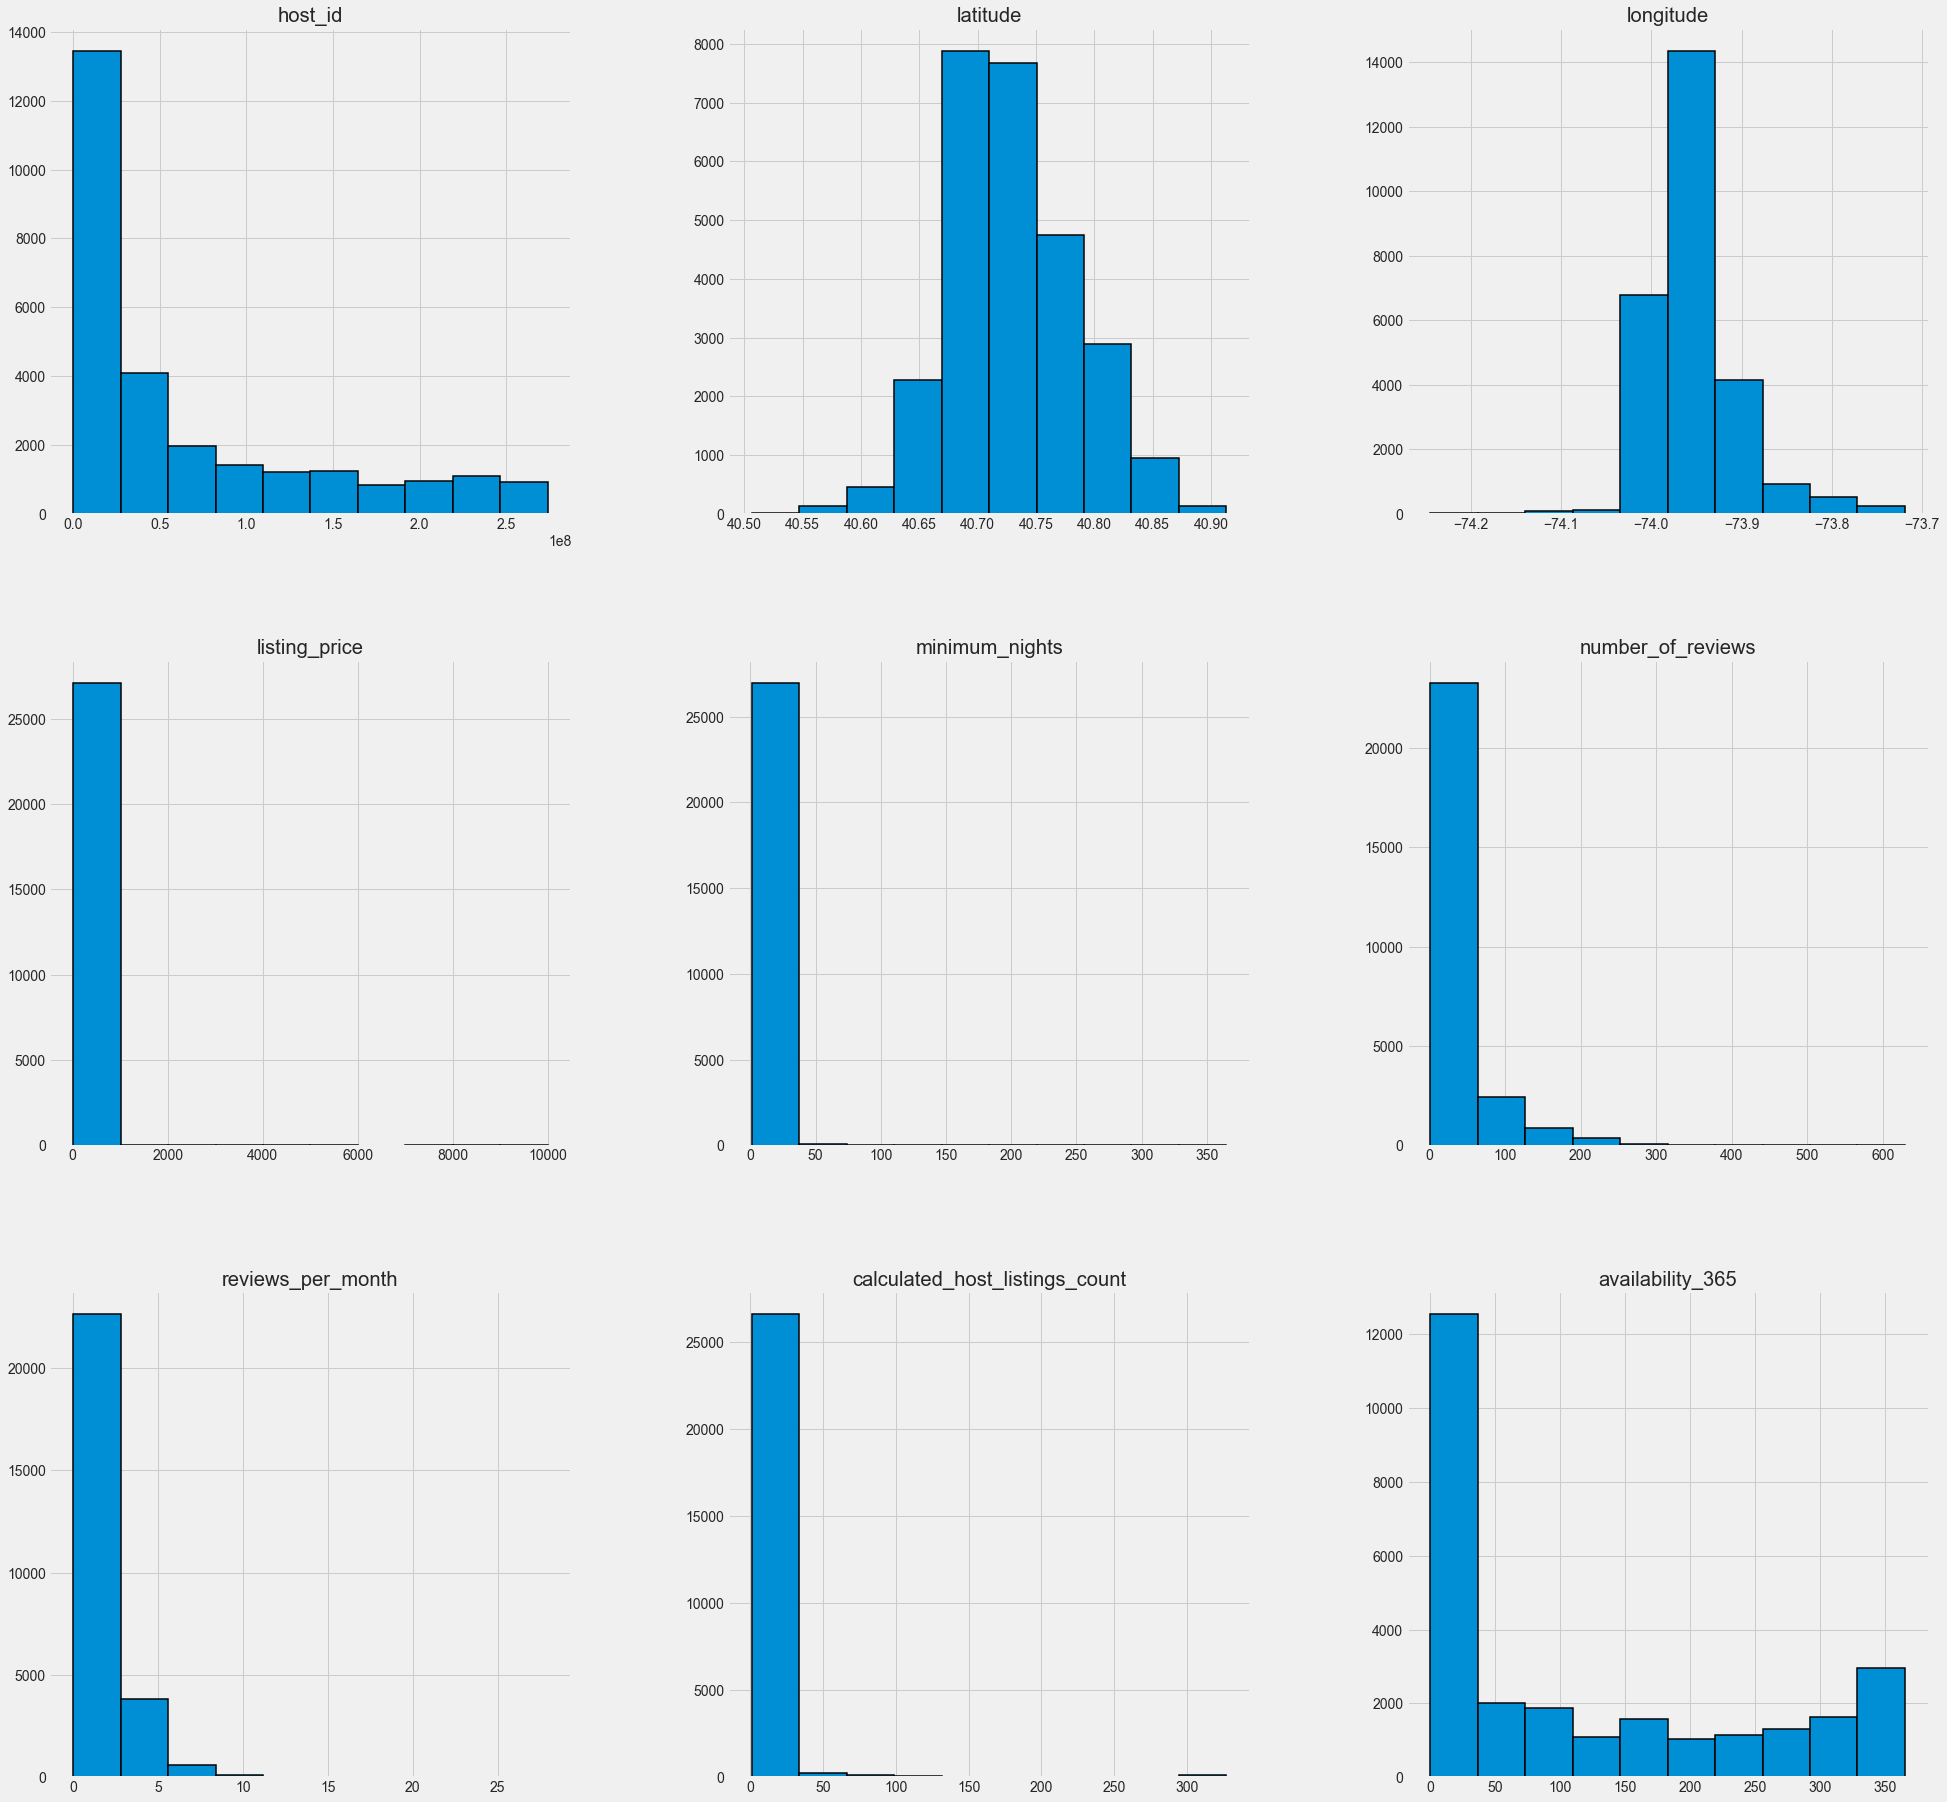

In [17]:
## Visualization:

train_df.iloc[:,1:].hist(edgecolor="black", linewidth=1.5, figsize=(30, 30));

Since most of the distributions of the numeric variables or features are right skewed(except longitude and latitude) in the given data set we can think of applying standard scalar on the numeric values.

<br><br>

<Figure size 2160x2160 with 0 Axes>

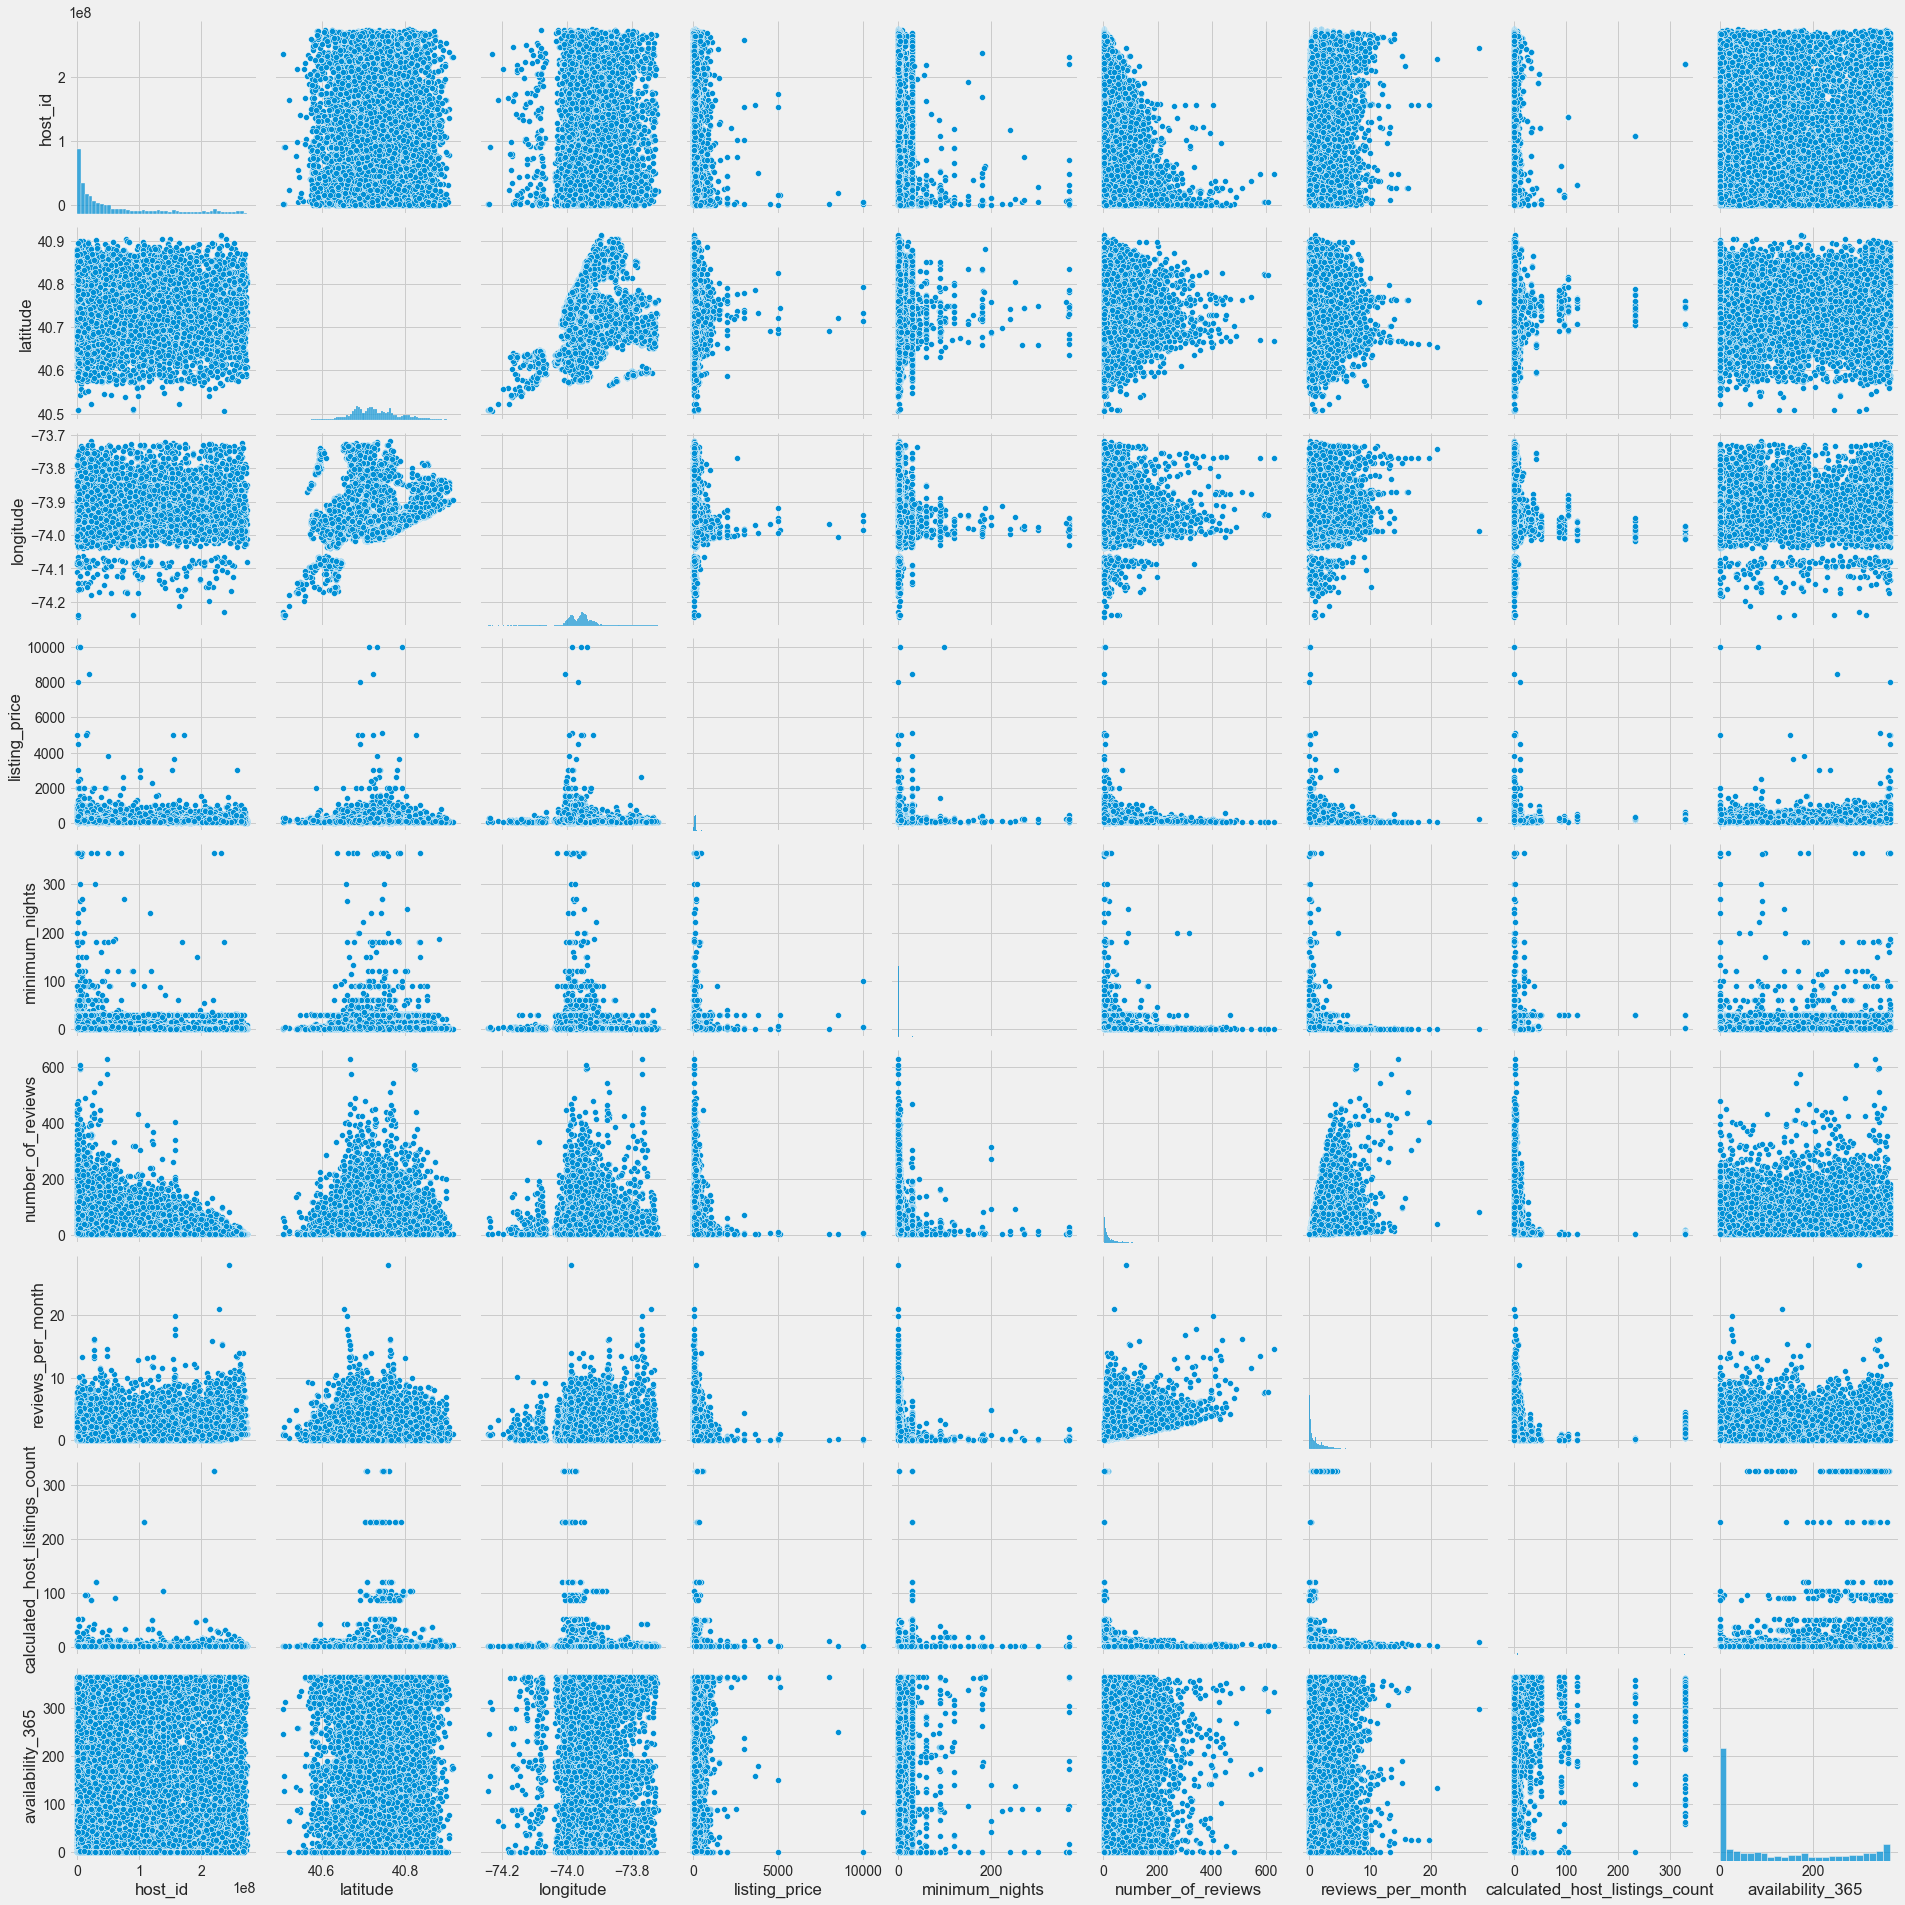

In [18]:
## Visualization:

plt.figure(figsize=(30, 30))
sns.pairplot(train_df.iloc[:,1:], height=3, diag_kind="hist")

As can be observed from the scatter plots for each feature and the correlation scatter plots, the majority of the features are not as associated as the feature number of reviews to the target reviews per month.

In [19]:
## Summary Stat:

numeric_vars = ['reviews_per_month','longitude','latitude','listing_price',
'minimum_nights','number_of_reviews',
'calculated_host_listings_count','availability_365']

cor = train_df[numeric_vars].corr()
cor

,reviews_per_month,longitude,latitude,listing_price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
reviews_per_month,1.000000,0.152939,-0.011792,-0.036640,-0.145038,0.553356,-0.006991,0.180456
longitude,0.152939,1.000000,0.093457,-0.155897,-0.064060,0.055223,-0.092303,0.103476
latitude,-0.011792,0.093457,1.000000,0.031998,0.026161,-0.014137,0.001374,-0.025101
listing_price,-0.036640,-0.155897,0.031998,1.000000,0.026192,-0.036105,0.053776,0.079579
minimum_nights,-0.145038,-0.064060,0.026161,0.026192,1.000000,-0.079891,0.084998,0.107457
number_of_reviews,0.553356,0.055223,-0.014137,-0.036105,-0.079891,1.000000,-0.058070,0.194655
calculated_host_listings_count,-0.006991,-0.092303,0.001374,0.053776,0.084998,-0.058070,1.000000,0.180929
availability_365,0.180456,0.103476,-0.025101,0.079579,0.107457,0.194655,0.180929,1.000000


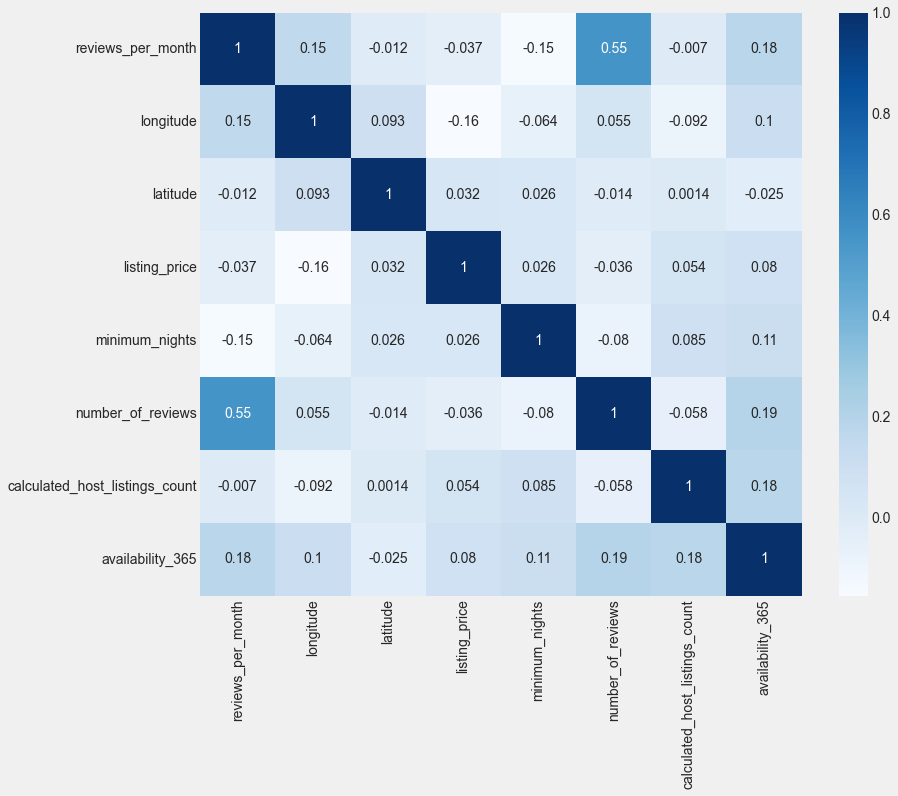

In [20]:
## Visvualization:

import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

As can be seen from the summary stats and visualization for the correlation, the majority of the features are not as closely related to the target reviews per month as the feature number of reviews, so it's a good idea to drop the feature since the feature number of reviews is unlikely to be present in the deployment data.

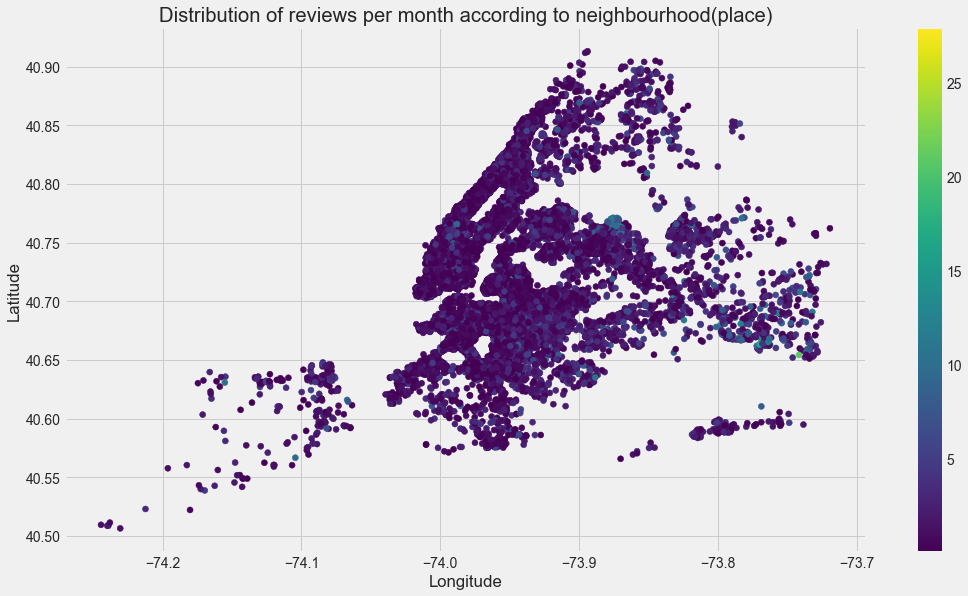

In [21]:
y = train_df.latitude
x = train_df.longitude
p = train_df.reviews_per_month
plt.figure(figsize=(16,9))
plt.scatter(x,y,c=p,cmap='viridis')
plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribution of reviews per month according to neighbourhood(place)")
plt.show()

As seen from the visualization above the high target review per month are evenly spread among the areas, so its a bad idea to group the neighbourhood into popular or not popular neighbourhoods.

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [22]:
import datetime
train_df["last_review"] = pd.to_datetime(train_df.last_review)
train_df["last_review_interval"] = ((datetime.datetime(2019,12,31) - train_df.last_review)/ np.timedelta64(1, 'D')).astype(int)
test_df["last_review"] = pd.to_datetime(test_df.last_review)
test_df["last_review_interval"] = ((datetime.datetime(2019,12,31) - test_df.last_review)/ np.timedelta64(1, 'D')).astype(int)


#### New Feature: last_review_interval
Here I am creating a new feature to capture the number of days since the last review till the end of 2019. Since the data is until 2019.

In [23]:
train_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,listing_price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_interval
19753,15817291,Cozy Quiet Room in the Big Apple on Broadway!!!,102383709,Mark & Will,Manhattan,Harlem,40.82914,-73.94736,Private room,69,4,153,2019-07-01,4.74,2,125,183
27025,21390016,Spacious 1 Bed PENTHOUSE Apt w/ Incredible VIEWS,2762154,Bethany,Brooklyn,Sunset Park,40.63863,-74.01916,Entire home/apt,88,14,1,2017-11-19,0.05,1,0,772
14978,11924652,Upper west side luxury building,39111035,Veronica,Manhattan,Upper West Side,40.78079,-73.98826,Private room,160,2,2,2016-08-31,0.06,1,0,1217
1310,573612,"Sunny Private Bedroom by Express Train, Colleges!",2270624,Ny,Manhattan,Harlem,40.81199,-73.95116,Private room,79,1,132,2019-06-16,1.56,2,335,198
46939,35496676,Cozy Private Bedroom in Upper West Side,266522456,Aaron,Manhattan,Upper West Side,40.80140,-73.96563,Private room,130,1,9,2019-07-07,9.00,3,79,177


In [24]:
test_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,listing_price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_interval
39615,30823817,New York Lovely Quiet Room near to Time’s Square,137191484,Maria,Manhattan,Hell's Kitchen,40.76436,-73.98779,Private room,120,1,31,2019-06-21,4.67,5,321,193
19575,15660209,HUGE CHEERFUL PRIVATE STUDIO SUITE WITH BACKYARD,21640001,Anna,Queens,Rego Park,40.71840,-73.86015,Entire home/apt,95,2,7,2017-09-03,0.23,1,345,849
38353,30202750,"Large 2 BR, loft-like apartment in historic house",17011664,Ann Marie,Staten Island,St. George,40.64682,-74.08575,Entire home/apt,86,5,1,2019-01-03,0.16,1,43,362
23082,18690466,Spacious 2bed private rm close St.BarnabasHosp...,127249880,Emma,Bronx,Tremont,40.84594,-73.89358,Private room,45,2,49,2019-05-26,1.95,2,324,219
10515,8066385,Share A Rustic Forte Greene studio w/ adorable...,4205261,Stephanie,Brooklyn,Clinton Hill,40.68667,-73.96760,Entire home/apt,104,2,15,2019-05-19,0.39,2,100,226


<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [25]:
drop_features = ["id", "host_name","last_review", "number_of_reviews"]
categorical_features = ["neighbourhood_group", "neighbourhood","room_type","host_id"]
text_feature = "name"
target = "reviews_per_month"

numeric_features = list(
    set(train_df.columns)
    - set(drop_features)
    - set([text_feature])
    - set(categorical_features)
    - set([target])
)


In [26]:
numeric_features

['availability_365',
 'calculated_host_listings_count',
 'latitude',
 'minimum_nights',
 'longitude',
 'listing_price',
 'last_review_interval']

In [27]:
preprocessor_all = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore", dtype="int"), categorical_features),
    (CountVectorizer(stop_words="english", max_features=1000), text_feature),
    ("drop", drop_features),
) 

1) We are applying StandardScalar on all the numeric features to bring them down to standardized scales as they are in different units.
2) We are applying OneHotEncoding on the categorical features we selected after performing an EDA.
3) We are applying Bag of Words on the feature `name` to extract words that add value to the model.

In [28]:
X_train, y_train = train_df.drop(columns=[target]), train_df[target]
X_test, y_test = test_df.drop(columns=[target]), test_df[target]

In [29]:
preprocessor_all.fit(X_train);

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>
rubric={accuracy:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [30]:
# Adapting the function from lecture notes.

from sklearn.metrics import make_scorer


def mape(true, pred):
    return 100.0 * np.mean(np.abs((pred - true) / true))


# make a scorer function that we can pass into cross-validation
mape_scorer = make_scorer(mape, greater_is_better=False)

scoring_metrics = {
    "neg RMSE": "neg_root_mean_squared_error",
    "r2": "r2",
    "mape": mape_scorer,
}

In [31]:
results = {}

In [32]:
# Adapting the function from lecture notes.

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<br><br>

In [33]:
results["Dummy"] = mean_std_cross_val_scores(
    DummyRegressor(), X_train, y_train, return_train_score=True, scoring=scoring_metrics
)
pd.DataFrame(results).T

,fit_time,score_time,test_neg RMSE,train_neg RMSE,test_r2,train_r2,test_mape,train_mape
Dummy,0.002 (+/- 0.000),0.001 (+/- 0.000),-1.671 (+/- 0.043),-1.672 (+/- 0.011),-0.000 (+/- 0.000),0.000 (+/- 0.000),-684.948 (+/- 7.058),-684.968 (+/- 5.283)


## 7. Linear models <a name="7"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [34]:
pipe_ridge = make_pipeline(
    preprocessor_all, Ridge(max_iter =2000,random_state=123)
)
results["Ridge"] = mean_std_cross_val_scores(
    pipe_ridge,X_train, y_train, return_train_score=True, scoring=scoring_metrics,n_jobs=-1
)
pd.DataFrame(results).T

,fit_time,score_time,test_neg RMSE,train_neg RMSE,test_r2,train_r2,test_mape,train_mape
Dummy,0.002 (+/- 0.000),0.001 (+/- 0.000),-1.671 (+/- 0.043),-1.672 (+/- 0.011),-0.000 (+/- 0.000),0.000 (+/- 0.000),-684.948 (+/- 7.058),-684.968 (+/- 5.283)
Ridge,0.437 (+/- 0.011),0.047 (+/- 0.002),-1.338 (+/- 0.034),-0.708 (+/- 0.005),0.359 (+/- 0.024),0.821 (+/- 0.001),-364.588 (+/- 10.330),-187.070 (+/- 1.727)


In [35]:
pipe_ridge

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['availability_365',
                                                   'calculated_host_listings_count',
                                                   'latitude', 'minimum_nights',
                                                   'longitude', 'listing_price',
                                                   'last_review_interval']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['neighbourhood_group',
                                                   'neighbourhood', 'room_type',
                                          

In [36]:
from sklearn.model_selection import RandomizedSearchCV

param_random = {"ridge__alpha": [0.01,0.1,0.5,0.75,0.8,0.9,1]}

random_search = RandomizedSearchCV(
    pipe_ridge, param_distributions=param_random, n_jobs=-1,random_state =123,scoring = "r2", n_iter =20
)
random_search.fit(X_train, y_train)

print("Best Hyper-Parameters are:", random_search.best_params_)

/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyper-Parameters are: {'ridge__alpha': 0.75}


In [37]:
print("Best Score is:", random_search.best_score_)

Best Score is: 0.36022624526144964


#### Task 4:
1) Ridge is a simple linear model and takes very less time to fit and output results.
2) As seen from the scores ridge performs poorly on our data since our data doesn't seem to follow a linear pattern.
3) Ridge is outperforming the dummy.
4) Also ridge is overfitting the train data.
5) After performing hyper parameter optimization, the best reported alpha is 0.75 and the best r2 score is 0.360 which is more compared to the default model with r2 0.359

<br><br>

## 8. Different models <a name="8"></a>
<hr>
rubric={accuracy:10,reasoning:6}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

In [38]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm.sklearn import LGBMRegressor


pipe_rf = make_pipeline(preprocessor_all, RandomForestRegressor(random_state=123))

pipe_xgb = make_pipeline(
    preprocessor_all, XGBRegressor(random_state=123, eval_metric = "logloss",verbosity=0)
)
pipe_lgbm = make_pipeline(preprocessor_all, LGBMRegressor(random_state=123))
pipe_catboost = make_pipeline(
    preprocessor_all, CatBoostRegressor(random_state=123, verbose = 0)
)
models = {
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "CatBoost": pipe_catboost,
}

In [39]:
for (name, model) in models.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, n_jobs= -1, scoring = scoring_metrics
    )
pd.DataFrame(results).T

,fit_time,score_time,test_neg RMSE,train_neg RMSE,test_r2,train_r2,test_mape,train_mape
Dummy,0.002 (+/- 0.000),0.001 (+/- 0.000),-1.671 (+/- 0.043),-1.672 (+/- 0.011),-0.000 (+/- 0.000),0.000 (+/- 0.000),-684.948 (+/- 7.058),-684.968 (+/- 5.283)
Ridge,0.437 (+/- 0.011),0.047 (+/- 0.002),-1.338 (+/- 0.034),-0.708 (+/- 0.005),0.359 (+/- 0.024),0.821 (+/- 0.001),-364.588 (+/- 10.330),-187.070 (+/- 1.727)
random forest,597.857 (+/- 4.591),0.302 (+/- 0.040),-1.117 (+/- 0.030),-0.417 (+/- 0.002),0.553 (+/- 0.010),0.938 (+/- 0.001),-84.816 (+/- 2.353),-31.228 (+/- 0.156)
XGBoost,7.485 (+/- 0.071),0.100 (+/- 0.007),-1.114 (+/- 0.021),-0.924 (+/- 0.003),0.555 (+/- 0.012),0.694 (+/- 0.005),-120.959 (+/- 2.847),-114.935 (+/- 2.607)
LightGBM,1.906 (+/- 1.135),0.086 (+/- 0.022),-1.113 (+/- 0.020),-0.954 (+/- 0.004),0.557 (+/- 0.010),0.675 (+/- 0.003),-122.281 (+/- 2.926),-114.141 (+/- 0.612)
CatBoost,62.233 (+/- 0.616),0.124 (+/- 0.034),-1.104 (+/- 0.029),-0.974 (+/- 0.002),0.563 (+/- 0.013),0.660 (+/- 0.004),-128.842 (+/- 1.611),-126.250 (+/- 0.612)


### Task 2

Yes, all the models above are outperforming the dummy and the ridge(linear) model. The best model is the CatBoost with a test r2 of 0.563.  

#### Overfitting/Underfitting: 

Here the Random forests model is overfitting since the gap between the train and test scores is high. 
All other models seem to be performing fine on the data.

#### Fit time: 

The fit time is highest for the Random forest as the max depth is not specified and the model overfits the data.
LGBM  has the lowest fit time compared to all other models.

#### Score time:

Random forests has the highest score time.
LGBM has the lowest score time compared to all other models.

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

In [40]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import SelectFromModel

pipe_cat_las = make_pipeline(preprocessor_all, SelectFromModel(Lasso(alpha=0.01, max_iter=100000)),CatBoostRegressor(verbose=0, random_state=123))

res = mean_std_cross_val_scores(pipe_cat_las,X_train, y_train,scoring=scoring_metrics,return_train_score=True)
res

fit_time             7.320 (+/- 0.178)
score_time           0.044 (+/- 0.003)
test_neg RMSE       -1.106 (+/- 0.017)
train_neg RMSE      -0.892 (+/- 0.002)
test_r2              0.562 (+/- 0.017)
train_r2             0.715 (+/- 0.004)
test_mape         -119.789 (+/- 4.131)
train_mape        -109.001 (+/- 0.424)
dtype: object

Since the test R2 score has reduced using the feature selection. Its not a good idea to include the given feature selection. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

In [41]:

params = {
    "random forest": {'randomforestregressor__max_depth': [10,20]},
    "XGBoost": {'xgbregressor__max_depth' : [10, 20]},
    "LightGBM": {'lgbmregressor__n_estimators': [50, 100, 120], 'lgbmregressor__max_depth' : [10, 20, 30, 40]},
    "CatBoost": {'catboostregressor__max_depth' : [10, 20]} }

for (name, model) in models.items():
    print("Running hyperparameter optimization for",name)
    random_search = RandomizedSearchCV(model, param_distributions=params[name], n_jobs=-1,random_state =123,scoring = "r2",n_iter= 3)
    random_search.fit(X_train,y_train)
    print("Best Hyper-Parameters are", random_search.best_params_)
    print("Best Score", random_search.best_score_)
    

Running hyperparameter optimization for random forest


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyper-Parameters are {'randomforestregressor__max_depth': 20}
Best Score 0.5527223925285295
Running hyperparameter optimization for XGBoost


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyper-Parameters are {'xgbregressor__max_depth': 10}
Best Score 0.5474024809742594
Running hyperparameter optimization for LightGBM
Best Hyper-Parameters are {'lgbmregressor__n_estimators': 120, 'lgbmregressor__max_depth': 20}
Best Score 0.5580621415760973
Running hyperparameter optimization for CatBoost


/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/miniconda3/envs/573/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/envs/573/lib/python3.9

Best Hyper-Parameters are {'catboostregressor__max_depth': 10}
Best Score 0.5756535141869371


From the above hyper parameter optimization experiments the r2 scores have improved for our best performing model i.e. CatBoost and we can implement the optimized max_depth value for the CatBoost in the final model.

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`), or any other methods of your choice, to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [44]:
import shap

In [45]:
pipe_catboost_opti = make_pipeline(
    preprocessor_all, CatBoostRegressor(random_state=123, verbose = 0, max_depth =10))

In [46]:
pipe_catboost_opti.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['availability_365',
                                                   'calculated_host_listings_count',
                                                   'latitude', 'minimum_nights',
                                                   'longitude', 'listing_price',
                                                   'last_review_interval']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(dtype='int',
                                                                handle_unknown='ignore'),
                                                  ['neighbourhood_group',
                                                   'neighbourhood', 'room_type',
                                          

<br><br>

In [47]:
standard_scalar_names= pipe_catboost_opti.named_steps['columntransformer'].named_transformers_['standardscaler'].get_feature_names_out().tolist()
onehot_names= pipe_catboost_opti.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out().tolist()
countvect_names = pipe_catboost_opti.named_steps['columntransformer'].named_transformers_['countvectorizer'].get_feature_names_out().tolist()
feature_names = standard_scalar_names + onehot_names+ countvect_names

In [48]:
X_train_enc = pd.DataFrame(
    data=preprocessor_all.transform(X_train).toarray(),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()

,availability_365,calculated_host_listings_count,latitude,minimum_nights,longitude,listing_price,last_review_interval,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,yard,yards,year,yoga,york,yorker,young,zen,zoo,纽约之家
19753,0.079620,-0.118625,1.835875,-0.123304,0.086940,-0.370556,-0.650774,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27025,-0.885827,-0.157025,-1.627613,0.573776,-1.456292,-0.274560,0.763096,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14978,-0.885827,-0.157025,0.956868,-0.262720,-0.792144,0.089212,1.831299,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1310,1.701569,-0.118625,1.524087,-0.332428,0.005264,-0.320032,-0.614767,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46939,-0.275665,-0.080224,1.331559,-0.332428,-0.305746,-0.062360,-0.665176,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
X_test_enc = pd.DataFrame(
    data=preprocessor_all.transform(X_test).toarray(),
    columns=feature_names,
    index=X_test.index,
)
X_test_enc.head()

,availability_365,calculated_host_listings_count,latitude,minimum_nights,longitude,listing_price,last_review_interval,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,...,yard,yards,year,yoga,york,yorker,young,zen,zoo,纽约之家
39615,1.593439,-0.003424,0.658169,-0.332428,-0.782042,-0.112884,-0.626769,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19575,1.778805,-0.157025,-0.177388,-0.262720,1.961385,-0.239194,0.947931,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38353,-0.553713,-0.157025,-1.478718,-0.053596,-2.887542,-0.284665,-0.221092,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23082,1.616610,-0.118625,2.141301,-0.262720,1.242859,-0.491813,-0.564357,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10515,-0.113470,-0.118625,-0.754242,-0.262720,-0.348088,-0.193722,-0.547554,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
cat_explainer = shap.TreeExplainer(pipe_catboost_opti.named_steps["catboostregressor"])
train_cat_shap_values = cat_explainer.shap_values(X_train_enc)

In [51]:
shap.initjs()

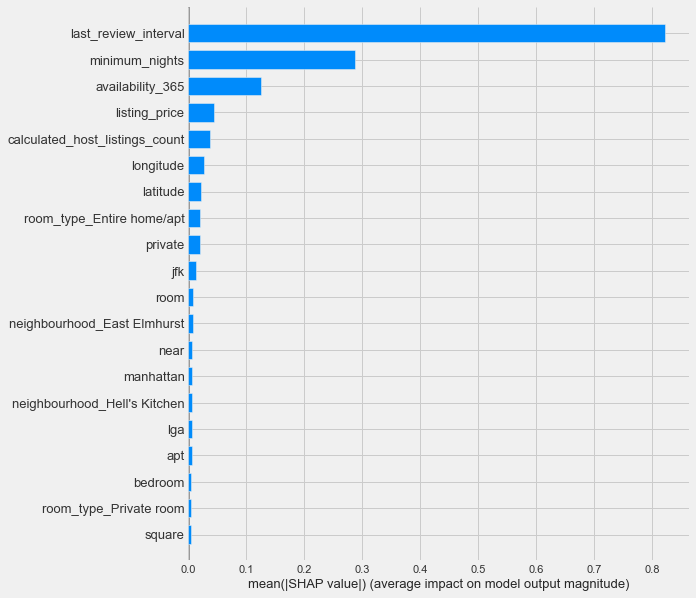

In [52]:
shap.summary_plot(train_cat_shap_values, X_train_enc, plot_type="bar")

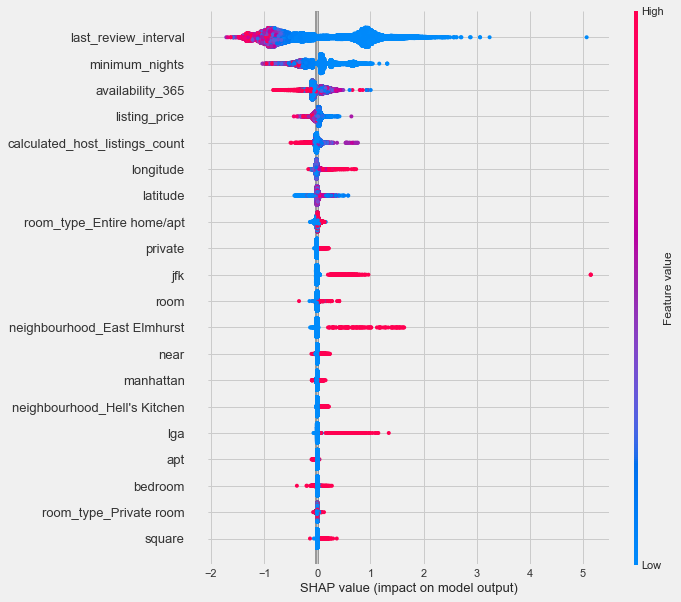

In [53]:
shap.summary_plot(train_cat_shap_values, X_train_enc)

#### Task 2

### Plot1: 
The plot 1 or the first plot shows the average SHAP value for each feature. From the plot we can infer that the feature `last_review_interval` has the highest impact on the predictions and the feature `minimum_nights` is the second highest.

### Plot2:
Plot 2 shows the importance of each feature and the direction the particular feature drives the prediction in.From the plot we infer.

For higher values of the feature `last_review_interval` the prediction is driven in a negative direction i.e. lower values, while a lower value will push the predictions to a positive direction i.e. higher values.Since recently reviewed listings will have more popularity or review_per_month. Thus, the SHAP plot makes sense.

For higher values of the feature `minimum_nights` the prediction is driven in a negative direction i.e. lower values, while a lower value will push the predictions to a positive value i.e. higher values. Since customer like to book listings which are more flexible and prefer lower minimum nights the given feature importance and the SHAP plot makes sense.


## 12. Results on the test set <a name="12"></a>
<hr>

rubric={accuracy:6,reasoning:4}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  

In [54]:
print ("R2 Score:",pipe_catboost_opti.score(X_test, y_test))

R2 Score: 0.5762060843120612


In [55]:
from sklearn.metrics import mean_squared_error
preds = pipe_catboost_opti.predict(X_test)
print ("RMSE Score:",mean_squared_error(y_test, preds))
print ("Mape Score:",mape(y_test, preds))


RMSE Score: 1.2261407025989037
Mape Score: 121.6046976053236


#### Task 2:
Yes the test scores agree with the validation scores and are similar.I am confident that my model doesn't suffer from optimization bias. Optimization Bias occurs when our dataset is small and our validation set is hit too many times, we suffer from optimization bias or overfitting the validation set.Here it doesn't occur since the test and the train set are large enough.
Looking at the scores I expect my model to work similarly on the deployment data.

In [56]:
y_test.head()

39615    4.67
19575    0.23
38353    0.16
23082    1.95
10515    0.39
Name: reviews_per_month, dtype: float64

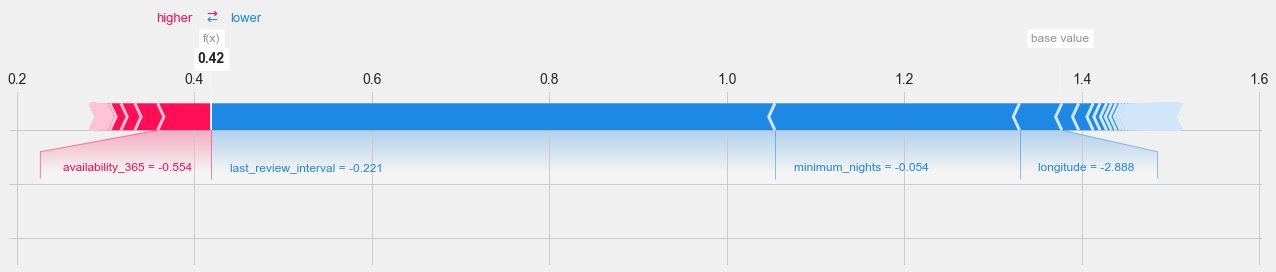

In [57]:
X_train_enc = X_train_enc.round(3)
X_test_enc = X_test_enc.round(3)

test_cat_shap_values = cat_explainer.shap_values(X_test_enc[:100])

shap.force_plot(
    cat_explainer.expected_value,
    test_cat_shap_values[2],
    X_test_enc.iloc[2, :],
    matplotlib=True,
)

As seen the higher values of the least_review_interval and minimum_nights are driving the prediction in the negative direction and lower value of availability_365 is driving the prediction in positive direction.Which is evident from the inference drawn from the SHAP summary plot.

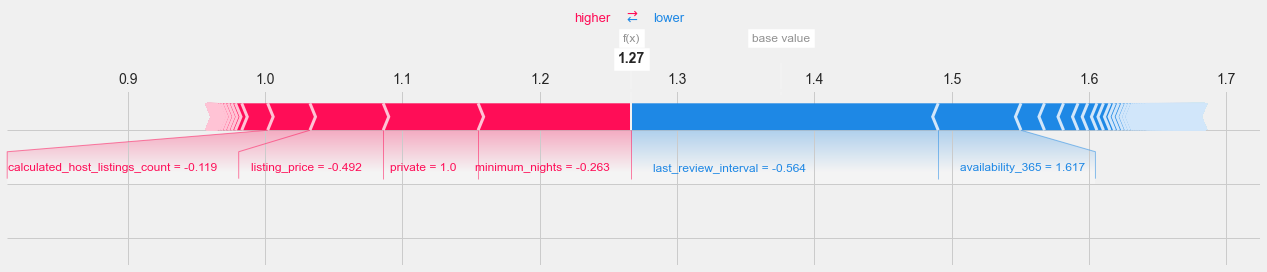

In [58]:
shap.force_plot(
    cat_explainer.expected_value,
    test_cat_shap_values[3],
    X_test_enc.iloc[3, :],
    matplotlib=True,
)

As seen from the plot lower value of minimum_nights and the presence of the word private is driving the prediction in the positive direction while higher value of the last_review_interval is driving the prediction in negative direction.

<br><br>

## 13. Summary of results <a name="13"></a>
<hr>
rubric={reasoning:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

In [63]:
from tabulate import tabulate
head= ['Model','Type','Dataset','Test R2 score','Test mape','Remarks']

data= [('Dummy Regressor','Non-linear','Train','0','685','Baseline'),
      ('Ridge','Linear','Train','0.359','0.821','Liner/simple model, less fit time ,low r2'),
      ('Random Forest Regressor','Non-linear','Train','0.553','85','Low mape score, Overfitting, high fit time'),
      ('XGBoost Regressor','Non-linear','Train','0.555', '121', 'High mape score, low r2'),
      ('LGBM Regressor','Non-linear','Train','0.557','122','Less fit time, low r2 '),
      ('CatBoost Regressor','Non-linear','Train','0.563','129','Best individual model,significant fit time'),
      ('CatBoost Regressor','Non-linear','Test','0.576','122', 'Optimized model used on the test set')]

print(tabulate(data,headers= head,tablefmt= "grid"))


+-------------------------+------------+-----------+-----------------+-------------+--------------------------------------------+
| Model                   | Type       | Dataset   |   Test R2 score |   Test mape | Remarks                                    |
+=========================+============+===========+=================+=============+============================================+
| Dummy Regressor         | Non-linear | Train     |           0     |     685     | Baseline                                   |
+-------------------------+------------+-----------+-----------------+-------------+--------------------------------------------+
| Ridge                   | Linear     | Train     |           0.359 |       0.821 | Liner/simple model, less fit time ,low r2  |
+-------------------------+------------+-----------+-----------------+-------------+--------------------------------------------+
| Random Forest Regressor | Non-linear | Train     |           0.553 |      85     | Low m

### Task2:

Using the proxy 'reviews per month' from the new york air bnb data set, we started with the problem statement of predicting the popularity of a listing. 

We performed the given steps.

1) Data cleaning: We removed some fake and unrealistic data, as well as cases with null target values. 

2) EDA: Obtaining the connection between features and determining which features should be engineered and preprocessed in which manner. 

3) Feature engineering:  We worked on a new feature called last review interval, which turned out to be the most important in terms of prediction. 

4) Preprocessing: We preprocessed our features according to their kind and what we learned from the EDA. 

5) Different Models: Trying out different regression models on the train data i.e. The Baseline, Linear and Non Linear Models.Comparing them based on scores, fit and score time and Underfit or Overfit. Got the Best model as CatBoost based on the scores.

6) Feature Selection: Using lasso and select from Model, tried feature selection and looked for improvements in cross val scores. There was no use in considering feature selection because there was no improvement. 

7) Hyper parameter optimization:  On the non-linear models used in step 3, performed Hyper parameter optimization and checked for improvements in scores. Because the scores improved, the optimised values were incorporated in the final pipe. 

8) Interpretation and feature importances: In the given step we implemented shap on our best model i.e. CatBoost  to gain insights as to which features have major impact on our prediction and which direction they drive the predictions to. From the given step we are able to infer the features last_review_interval, minimum nights and availability 365 play a major role in predicting the popularity.

9) Test data Evaluation: We used test data to evaluate our trained best model and presented the results as well as our knowledge of the predictions.

### Executive Summary:

The features `last_review_interval`, `minimum nights` and `availability 365` play a major role in predicting the popularity.And Airbnb can tap into these features to predict a listing's popularity before hand. And also guide the hosts to create more appealing listings based on these features. Since the given model was trained on New City data set the findings will be applicable to data from the city or one following the same pattern. The given features make sense since customers are more oriented towards more flexible listings and the listings that are reviewed recently.



### Task3:Future enhancements:

Because 'listing name' is a text feature, it may be further customised or feature engineered to capture the text's mood. 

We can also use binary features to check for the top terms in the 'listing name' or the description. 

To enhance the scores, we may have tried stacking  or averaging the regressors.

We could have altered the data to include polynomial features to implement a linear model

A better method for feature selection can also be used.



### Task 4: Final Scores

R2 SCORE: 0.5762060843120612

MAPE SCORE: 1.2261407025989037

RMSE SCORE: 121.6046976053236


<br><br>

## (Optional) 14. Creating a data analysis pipeline <a name="14"></a>
rubric={reasoning:2}

**Your tasks:**
- In 522 you learned how build a reproducible data analysis pipeline. Convert this notebook into scripts and create a reproducible data analysis pipeline with appropriate documentation. 

<br><br>

## (Optional) 15. Your takeaway from the course <a name="15"></a>
<hr>
rubric={reasoning:1}

**Your tasks:**

What is your biggest takeaway from this course? 

<br>The course introduced me to feature engineering. I think that's my biggest takeaway from the course. Because small tweaks in a feature can improve the model performance significantly. The course<br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Push all your work to your GitHub lab repository. 
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

Well done!! Have a great weekend! 

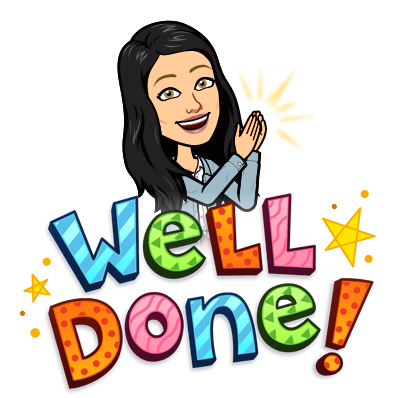

In [61]:
from IPython.display import Image

Image("eva-well-done.png")